<a href="https://colab.research.google.com/github/antipovaya/probability-theory-and-mathematical-statistics/blob/main/%D0%9B%D0%B8%D0%BD%D0%B5%D0%B9%D0%BD%D0%B0%D1%8F_%D1%80%D0%B5%D0%B3%D1%80%D0%B5%D1%81%D1%81%D0%B8%D1%8F_%D0%9B%D0%BE%D0%B3%D0%B8%D1%81%D1%82%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%B0%D1%8F_%D1%80%D0%B5%D0%B3%D1%80%D0%B5%D1%81%D1%81%D0%B8%D1%8F.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

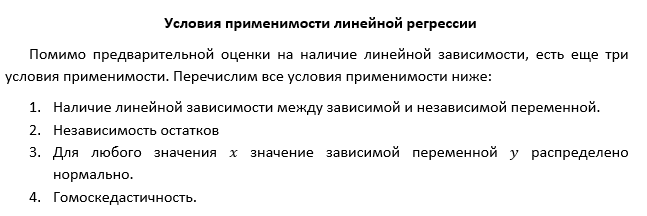

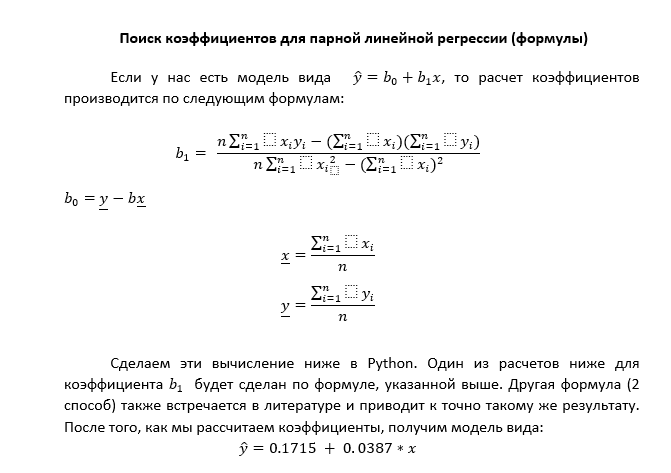

In [6]:
import numpy as np


s = np.array([27, 37, 42, 48, 57, 56, 77, 80])
p = np.array([1.2, 1.6, 1.8, 1.8, 2.5, 2.6, 3, 3.3])
n = 8
b1 = (n * np.sum(p * s) - np.sum(s) * np.sum(p)) / (n * np.sum(s ** 2) - np.sum(s)**2)
print(b1)
b0 = np.mean(p) - b1 * np.mean(s)
print(b0)

# или 2-й способ чрез средние:
b1 = (np.mean(p * s) - np.mean(s) * np.mean(p)) / (np.mean(s ** 2) - np.mean(s)**2)
print(b1)

y_pred = b0 + b1 * s
print(y_pred)

0.03874584717607981
0.17147009966776983
0.03874584717607981
[1.21760797 1.60506645 1.79879568 2.03127076 2.37998339 2.34123754
 3.15490033 3.27113787]


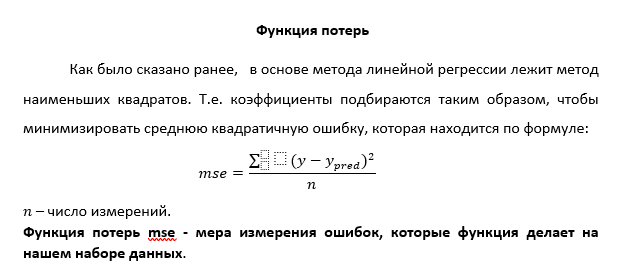

**MSE** - это среднее значение квадратов разностей между фактическими и предсказанными значениями.

**Интерпретация:**

Чем меньше MSE, тем лучше модель

MSE измеряется в квадратах единиц целевой переменной

Чувствителен к выбросам (большие ошибки сильно влияют на результат)

**Коэффициент детерминации R²**  
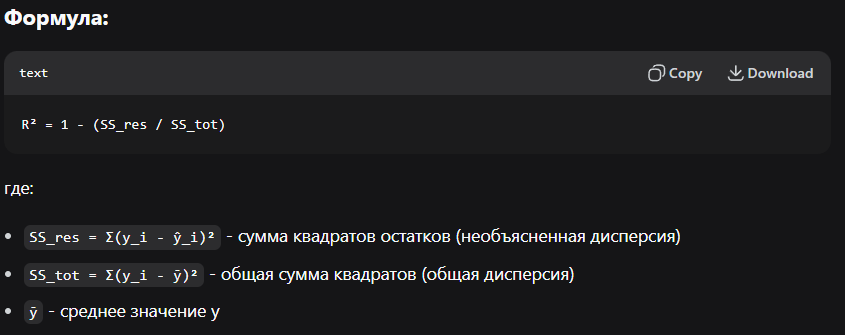

**Интерпретация:**

0 ≤ R² ≤ 1

R² = 1: идеальное объяснение (все точки на линии)

R² = 0: модель не лучше, чем предсказание средним значением

R² < 0: модель хуже, чем предсказание средним значением

**Функция потерь MSE:**

* Прямая мера ошибки - показывает, насколько в среднем ошибается модель

* Используется при обучении - алгоритм оптимизирует параметры, минимизируя MSE

* Чувствителена к выбросам - большие ошибки сильно влияют на значение


**Коэффициент детерминации R²:**

* Относительная мера качества - показывает долю объясненной дисперсии

* Легко интерпретируется - от 0% до 100% объясненной вариации

* Позволяет сравнивать модели - даже на разных наборах данных


**Взаимосвязь:**

* Хорошая модель имеет низкий MSE и высокий R²

* Можно иметь низкий R², но приемлемый MSE (если данные очень шумные)

* Можно иметь высокий R², но высокий MSE (если масштаб данных большой)


На практике обе метрики важны: MSE показывает абсолютную величину ошибок, а R² - относительное качество модели по сравнению с простым предсказанием средним значением.

In [12]:
# Шаг 1: Расчет MSE вручную
mse = ((p - y_pred)**2).sum() / n
print(f"MSE (ручной расчет): {mse:.4f}")

MSE (ручной расчет): 0.0200


In [13]:
# Шаг 2: Расчет R² вручную
ss_res = np.sum((p - y_pred) ** 2)  # необъясненная дисперсия
ss_tot = np.sum((p - np.mean(p)) ** 2)  # общая дисперсия
r_squared_manual = 1 - (ss_res / ss_tot)
print(f"R² (ручной расчет): {r_squared_manual:.4f}")

R² (ручной расчет): 0.9576


In [17]:
# Сравнение с встроенными функциями
from sklearn.metrics import mean_squared_error, r2_score

mse_sklearn = mean_squared_error(p, y_pred)
r2_sklearn = r2_score(p, y_pred)

print(f"\nСравнение с sklearn:")
print(f"MSE: ручной = {mse:.4f}, sklearn = {mse_sklearn:.4f}")
print(f"R²: ручной = {r_squared_manual:.4f}, sklearn = {r2_sklearn:.4f}")

# Шаг 5: Более подробный анализ
print(f"\nДетальный анализ:")
print(f"Сумма квадратов остатков (SS_res) = {ss_res:.4f}")
print(f"Общая сумма квадратов (SS_tot) = {ss_tot:.4f}")
print(f"Объясненная сумма квадратов (SS_exp) = {ss_tot - ss_res:.4f}")

# Шаг 6: Интерпретация результатов
print(f"\nИнтерпретация:")
print(f"MSE = {mse:.4f} - средний квадрат ошибки предсказания")
print(f"RMSE = {np.sqrt(mse):.4f} - средняя ошибка предсказания в единицах Y")
print(f"R² = {r_squared_manual:.4f} - модель объясняет {r_squared_manual*100:.1f}% дисперсии Y")



Сравнение с sklearn:
MSE: ручной = 0.0200, sklearn = 0.0200
R²: ручной = 0.9576, sklearn = 0.9576

Детальный анализ:
Сумма квадратов остатков (SS_res) = 0.1600
Общая сумма квадратов (SS_tot) = 3.7750
Объясненная сумма квадратов (SS_exp) = 3.6150

Интерпретация:
MSE = 0.0200 - средний квадрат ошибки предсказания
RMSE = 0.1414 - средняя ошибка предсказания в единицах Y
R² = 0.9576 - модель объясняет 95.8% дисперсии Y


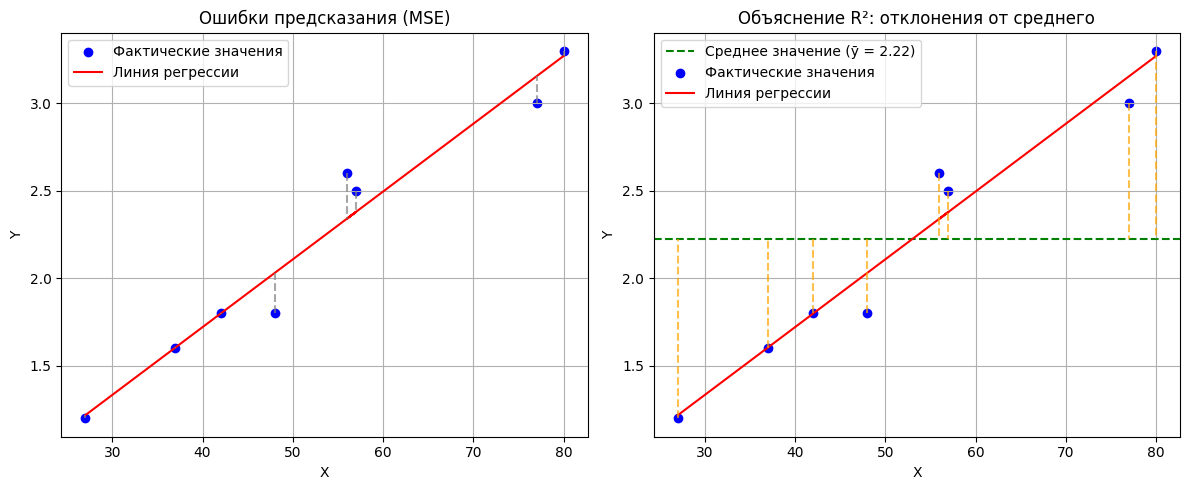

In [14]:
# Шаг 3: Визуализация для понимания MSE и R²
plt.figure(figsize=(12, 5))

# График 1: Фактические vs Предсказанные значения с ошибками
plt.subplot(1, 2, 1)
plt.scatter(s, p, color='blue', label='Фактические значения')
plt.plot(s, y_pred, color='red', label='Линия регрессии')

# Показываем ошибки (расстояния от точек до линии)
for i in range(n):
    plt.plot([s[i], s[i]], [p[i], y_pred[i]], 'gray', linestyle='--', alpha=0.7)

plt.xlabel('X')
plt.ylabel('Y')
plt.title('Ошибки предсказания (MSE)')
plt.legend()
plt.grid(True)

# График 2: Объяснение R²
plt.subplot(1, 2, 2)
mean_y = np.mean(p)
plt.axhline(y=mean_y, color='green', linestyle='--', label=f'Среднее значение (ȳ = {mean_y:.2f})')
plt.scatter(s, p, color='blue', label='Фактические значения')
plt.plot(s, y_pred, color='red', label='Линия регрессии')

# Показываем отклонения от среднего
for i in range(n):
    plt.plot([s[i], s[i]], [p[i], mean_y], 'orange', linestyle='--', alpha=0.7)

plt.xlabel('X')
plt.ylabel('Y')
plt.title('Объяснение R²: отклонения от среднего')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

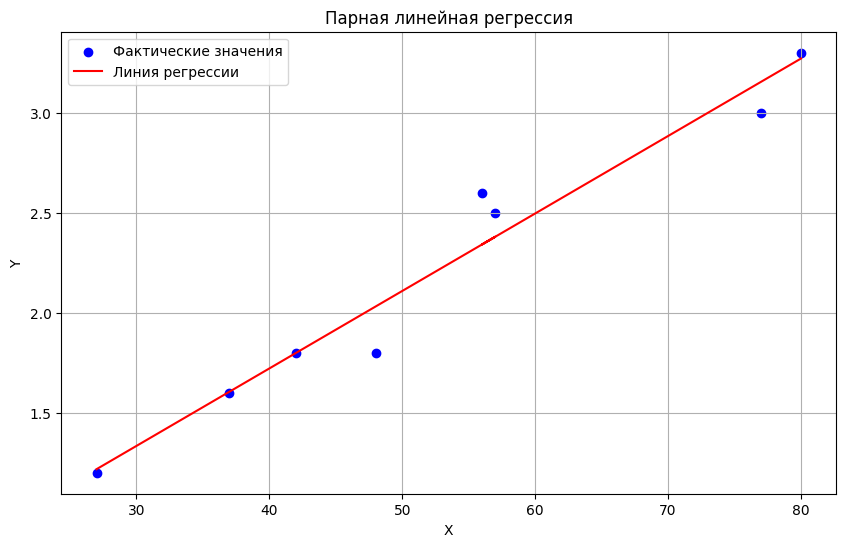

In [11]:
import matplotlib.pyplot as plt


# Визуализация результатов
plt.figure(figsize=(10, 6))
plt.scatter(s, p, color='blue', label='Фактические значения')
plt.plot(s, y_pred, color='red', label='Линия регрессии')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Парная линейная регрессия')
plt.legend()
plt.grid(True)
plt.show()

1. ГЕНЕРАЦИЯ ДАННЫХ
Размер датасета: (100, 2)

Первые 5 строк данных:
         area          price
0  106.181018  263667.741678
1  192.607146  430729.181666
2  159.799091  370974.594191
3  139.798773  299784.011540
4   73.402796  193510.513815

Описательная статистика:
             area          price
count  100.000000     100.000000
mean   120.527112  291038.017611
std     44.623412   88240.071995
min     50.828318  149776.823160
25%     78.980114  215778.063348
50%    119.621368  284186.112771
75%    159.530468  371026.128939
max    198.033040  457793.424057

2. ВИЗУАЛИЗАЦИЯ ДАННЫХ


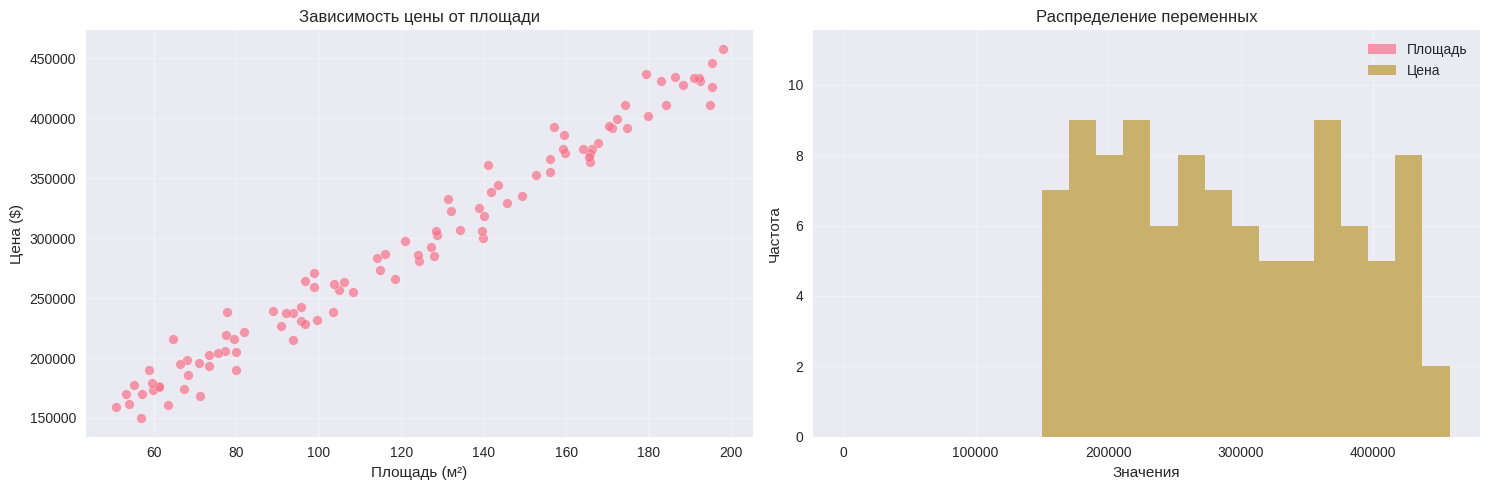


3. АНАЛИЗ КОРРЕЛЯЦИИ
Корреляция Пирсона: 0.9882
P-value: 0.0000
✅ Корреляция статистически значима

4. ПОДГОТОВКА ДАННЫХ
Обучающая выборка: 80 samples
Тестовая выборка: 20 samples

5. ОБУЧЕНИЕ МОДЕЛИ
Параметры модели:
Коэффициент (угол наклона): 1959.86
Intercept (пересечение): 54150.46

Интерпретация:
- Каждый дополнительный м² увеличивает стоимость на $1959.86
- Базовая стоимость (при площади 0 м²): $54150.46

6. ПРЕДСКАЗАНИЯ И ОЦЕНКА МОДЕЛИ
Mean Squared Error (MSE): 147082390.59
Root Mean Squared Error (RMSE): 12127.75
R² Score: 0.9825

Модель объясняет 98.3% дисперсии цен

7. ВИЗУАЛИЗАЦИЯ РЕЗУЛЬТАТОВ


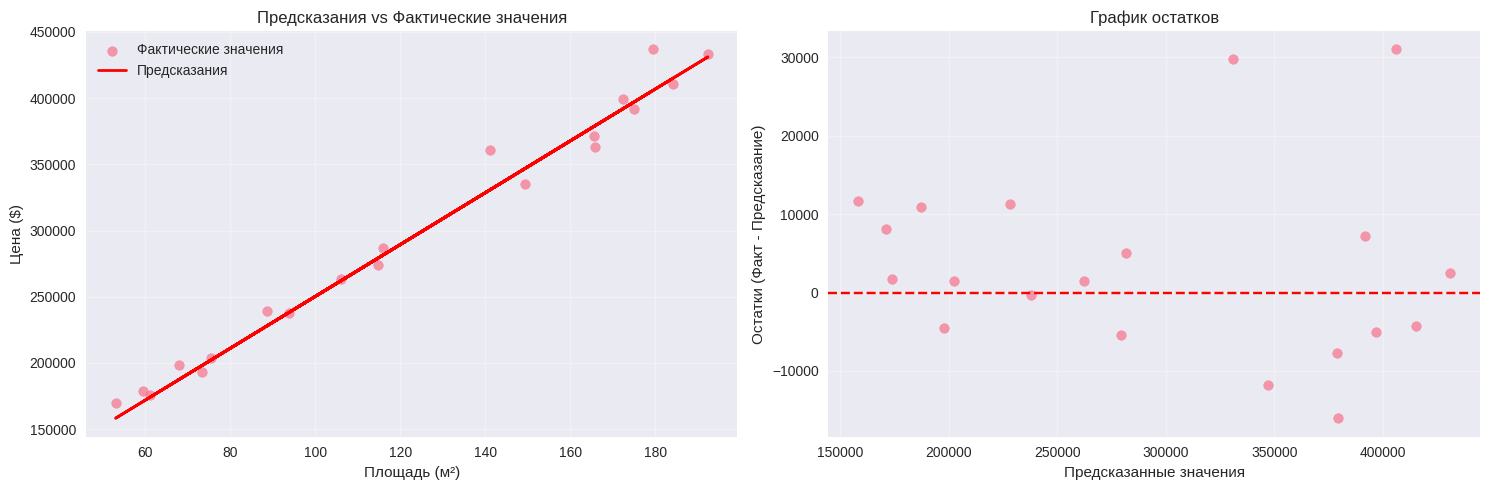


8. ПРЕДСКАЗАНИЕ ДЛЯ НОВЫХ ДОМОВ
Предсказания цен для новых домов:
Площадь 60 м² → Предсказанная цена: $171,742
Площадь 100 м² → Предсказанная цена: $250,137
Площадь 150 м² → Предсказанная цена: $348,130
Площадь 200 м² → Предсказанная цена: $446,123

9. ДОВЕРИТЕЛЬНЫЕ ИНТЕРВАЛЫ
Предсказания с 95% доверительными интервалами:
Площадь 60 м²: $171,742 (95% ДИ: $147,164 - $196,321)
Площадь 100 м²: $250,137 (95% ДИ: $225,810 - $274,464)
Площадь 150 м²: $348,130 (95% ДИ: $323,766 - $372,495)
Площадь 200 м²: $446,123 (95% ДИ: $421,333 - $470,914)

10. АНАЛИЗ ОСТАТКОВ
Тест Шапиро-Уилка на нормальность остатков: p = 0.1166
✅ Остатки распределены нормально
Тест Бартлетта на гомоскедастичность: p = 0.0000
❌ Дисперсия остатков непостоянна (гетероскедастичность)

11. ФИНАЛЬНАЯ ВИЗУАЛИЗАЦИЯ


/usr/local/lib/python3.12/dist-packages/numpy/_core/fromnumeric.py:84: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


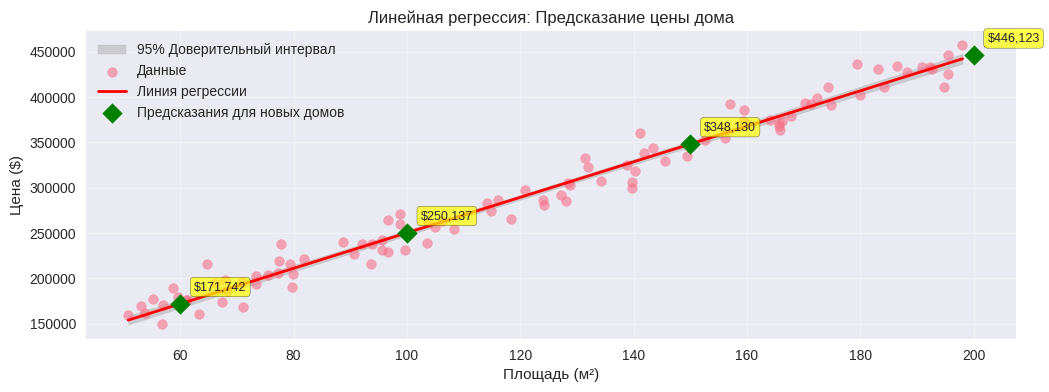


12. ЗАКЛЮЧЕНИЕ И ВЫВОДЫ
✅ МОДЕЛЬ УСПЕШНО ОБУЧЕНА!
📈 Объясненная дисперсия (R²): 98.3%
📏 Влияние площади: +$1959.86 за м²
🏠 Базовая стоимость: $54150.46
📊 Точность предсказаний: ±$12127.75 (RMSE)

Модель может использоваться для:
- Предсказания цен на дома по площади
- Анализа влияния площади на стоимость
- Сравнения фактических цен с predicted values


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from scipy import stats

# Установим стиль графиков
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# 1. ГЕНЕРАЦИЯ ИСКУССТВЕННЫХ ДАННЫХ
print("1. ГЕНЕРАЦИЯ ДАННЫХ")
print("=" * 50)

np.random.seed(42)  # Для воспроизводимости результатов
n_samples = 100     # Количество наблюдений

# Генерируем площадь домов (в м²) от 50 до 200 м²
area = np.random.uniform(50, 200, n_samples)

# Генерируем цену: базовая цена 50,000 + 2,000 за каждый м² + случайный шум
base_price = 50000
price_per_sqm = 2000
noise = np.random.normal(0, 15000, n_samples)  # Случайный шум

price = base_price + price_per_sqm * area + noise

# Создаем DataFrame
data = pd.DataFrame({'area': area, 'price': price})
print(f"Размер датасета: {data.shape}")
print("\nПервые 5 строк данных:")
print(data.head())
print(f"\nОписательная статистика:\n{data.describe()}")

# 2. ВИЗУАЛИЗАЦИЯ ДАННЫХ
print("\n2. ВИЗУАЛИЗАЦИЯ ДАННЫХ")
print("=" * 50)

fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Scatter plot
axes[0].scatter(data['area'], data['price'], alpha=0.7, edgecolors='w')
axes[0].set_xlabel('Площадь (м²)')
axes[0].set_ylabel('Цена ($)')
axes[0].set_title('Зависимость цены от площади')
axes[0].grid(True, alpha=0.3)

# Гистограммы распределения
axes[1].hist(data['area'], alpha=0.7, label='Площадь', bins=15)
axes[1].hist(data['price'], alpha=0.7, label='Цена', bins=15)
axes[1].set_xlabel('Значения')
axes[1].set_ylabel('Частота')
axes[1].set_title('Распределение переменных')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# 3. ПРОВЕРКА КОРРЕЛЯЦИИ
print("\n3. АНАЛИЗ КОРРЕЛЯЦИИ")
print("=" * 50)

# Расчет корреляции Пирсона
correlation, p_value = stats.pearsonr(data['area'], data['price'])
print(f"Корреляция Пирсона: {correlation:.4f}")
print(f"P-value: {p_value:.4f}")

if p_value < 0.05:
    print("✅ Корреляция статистически значима")
else:
    print("❌ Корреляция не значима")

# 4. ПОДГОТОВКА ДАННЫХ ДЛЯ МОДЕЛИ
print("\n4. ПОДГОТОВКА ДАННЫХ")
print("=" * 50)

# Разделяем на признаки (X) и целевую переменную (y)
X = data[['area']]  # Признаки (площадь)
y = data['price']   # Целевая переменная (цена)

# Разделяем на обучающую и тестовую выборки (80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Обучающая выборка: {X_train.shape[0]} samples")
print(f"Тестовая выборка: {X_test.shape[0]} samples")

# 5. СОЗДАНИЕ И ОБУЧЕНИЕ МОДЕЛИ
print("\n5. ОБУЧЕНИЕ МОДЕЛИ")
print("=" * 50)

# Создаем модель линейной регрессии
model = LinearRegression()

# Обучаем модель на тренировочных данных
model.fit(X_train, y_train)

# Выводим параметры модели
print("Параметры модели:")
print(f"Коэффициент (угол наклона): {model.coef_[0]:.2f}")
print(f"Intercept (пересечение): {model.intercept_:.2f}")

# Интерпретация параметров:
print("\nИнтерпретация:")
print(f"- Каждый дополнительный м² увеличивает стоимость на ${model.coef_[0]:.2f}")
print(f"- Базовая стоимость (при площади 0 м²): ${model.intercept_:.2f}")

# 6. ПРЕДСКАЗАНИЯ НА ТЕСТОВЫХ ДАННЫХ
print("\n6. ПРЕДСКАЗАНИЯ И ОЦЕНКА МОДЕЛИ")
print("=" * 50)

# Делаем предсказания на тестовых данных
y_pred = model.predict(X_test)

# Оцениваем качество модели
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R² Score: {r2:.4f}")

# Интерпретация R²
print(f"\nМодель объясняет {r2*100:.1f}% дисперсии цен")

# 7. ВИЗУАЛИЗАЦИЯ РЕЗУЛЬТАТОВ
print("\n7. ВИЗУАЛИЗАЦИЯ РЕЗУЛЬТАТОВ")
print("=" * 50)

fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# График предсказаний vs фактические значения
axes[0].scatter(X_test, y_test, alpha=0.7, label='Фактические значения')
axes[0].plot(X_test, y_pred, color='red', linewidth=2, label='Предсказания')
axes[0].set_xlabel('Площадь (м²)')
axes[0].set_ylabel('Цена ($)')
axes[0].set_title('Предсказания vs Фактические значения')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# График остатков (residual plot)
residuals = y_test - y_pred
axes[1].scatter(y_pred, residuals, alpha=0.7)
axes[1].axhline(y=0, color='red', linestyle='--')
axes[1].set_xlabel('Предсказанные значения')
axes[1].set_ylabel('Остатки (Факт - Предсказание)')
axes[1].set_title('График остатков')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# 8. ПРЕДСКАЗАНИЕ ДЛЯ НОВЫХ ДАННЫХ
print("\n8. ПРЕДСКАЗАНИЕ ДЛЯ НОВЫХ ДОМОВ")
print("=" * 50)

# Новые данные для предсказания
new_houses = pd.DataFrame({'area': [60, 100, 150, 200]})

# Делаем предсказания
predictions = model.predict(new_houses)

print("Предсказания цен для новых домов:")
for area, price in zip(new_houses['area'], predictions):
    print(f"Площадь {area:.0f} м² → Предсказанная цена: ${price:,.0f}")

# 9. ДОВЕРИТЕЛЬНЫЕ ИНТЕРВАЛЫ ДЛЯ ПРЕДСКАЗАНИЙ
print("\n9. ДОВЕРИТЕЛЬНЫЕ ИНТЕРВАЛЫ")
print("=" * 50)

# Рассчитаем стандартную ошибку предсказания
n = len(X_train)
p = 1  # количество признаков
X_mean = np.mean(X_train)
S_xx = np.sum((X_train - X_mean) ** 2)

# Стандартная ошибка для индивидуального предсказания
std_error = rmse * np.sqrt(1 + 1/n + (new_houses - X_mean)**2 / S_xx)

# 95% доверительный интервал (t-распределение)
t_value = stats.t.ppf(0.975, n - p - 1)
confidence_intervals = t_value * std_error

print("Предсказания с 95% доверительными интервалами:")
for i, (area, pred) in enumerate(zip(new_houses['area'], predictions)):
    ci_low = pred - confidence_intervals.iloc[i, 0]
    ci_high = pred + confidence_intervals.iloc[i, 0]
    print(f"Площадь {area:.0f} м²: ${pred:,.0f} (95% ДИ: ${ci_low:,.0f} - ${ci_high:,.0f})")

# 10. АНАЛИЗ ОСТАТКОВ
print("\n10. АНАЛИЗ ОСТАТКОВ")
print("=" * 50)

# Проверка нормальности остатков
residuals = y_test - y_pred
_, p_value_normality = stats.shapiro(residuals)

print(f"Тест Шапиро-Уилка на нормальность остатков: p = {p_value_normality:.4f}")
if p_value_normality > 0.05:
    print("✅ Остатки распределены нормально")
else:
    print("❌ Остатки не распределены нормально")

# Проверка гомоскедастичности (постоянства дисперсии)
_, p_value_hetero = stats.bartlett(y_pred, residuals)
print(f"Тест Бартлетта на гомоскедастичность: p = {p_value_hetero:.4f}")
if p_value_hetero > 0.05:
    print("✅ Дисперсия остатков постоянна (гомоскедастичность)")
else:
    print("❌ Дисперсия остатков непостоянна (гетероскедастичность)")

# 11. ФИНАЛЬНАЯ ВИЗУАЛИЗАЦИЯ
print("\n11. ФИНАЛЬНАЯ ВИЗУАЛИЗАЦИЯ")
print("=" * 50)

plt.figure(figsize=(12, 4))

# График с доверительными интервалами
x_range = np.linspace(data['area'].min(), data['area'].max(), 100).reshape(-1, 1)
y_range_pred = model.predict(x_range)

# Правильный расчет доверительных интервалов
# Преобразуем X_mean в числовое значение
X_mean_val = float(X_mean.iloc[0]) if hasattr(X_mean, 'iloc') else float(X_mean)
S_xx_val = float(S_xx.iloc[0]) if hasattr(S_xx, 'iloc') else float(S_xx)

# Рассчитываем стандартную ошибку для предсказаний
std_err_range = rmse * np.sqrt(1/len(X_train) + (x_range - X_mean_val)**2 / S_xx_val)
ci_range = t_value * std_err_range

plt.fill_between(x_range.flatten(),
                 (y_range_pred - ci_range.flatten()),
                 (y_range_pred + ci_range.flatten()),
                 alpha=0.3, color='gray', label='95% Доверительный интервал')

plt.scatter(data['area'], data['price'], alpha=0.6, label='Данные')
plt.plot(x_range, y_range_pred, 'r-', linewidth=2, label='Линия регрессии')

# Добавляем предсказания для новых домов
new_areas = np.array([[60], [100], [150], [200]])
new_predictions = model.predict(new_areas)
plt.scatter(new_areas, new_predictions, color='green', s=100, marker='D',
           label='Предсказания для новых домов', zorder=5)

plt.xlabel('Площадь (м²)')
plt.ylabel('Цена ($)')
plt.title('Линейная регрессия: Предсказание цены дома')
plt.legend()
plt.grid(True, alpha=0.3)

# Добавляем аннотации для новых домов
for area, price in zip(new_areas.flatten(), new_predictions):
    plt.annotate(f'${price:,.0f}',
                xy=(area, price),
                xytext=(10, 10),
                textcoords='offset points',
                bbox=dict(boxstyle="round,pad=0.3", facecolor="yellow", alpha=0.7),
                fontsize=9)

plt.show()

# 12. ЗАКЛЮЧЕНИЕ И ВЫВОДЫ
print("\n12. ЗАКЛЮЧЕНИЕ И ВЫВОДЫ")
print("=" * 50)
print("✅ МОДЕЛЬ УСПЕШНО ОБУЧЕНА!")
print(f"📈 Объясненная дисперсия (R²): {r2*100:.1f}%")
print(f"📏 Влияние площади: +${model.coef_[0]:.2f} за м²")
print(f"🏠 Базовая стоимость: ${model.intercept_:.2f}")
print(f"📊 Точность предсказаний: ±${rmse:.2f} (RMSE)")
print("\nМодель может использоваться для:")
print("- Предсказания цен на дома по площади")
print("- Анализа влияния площади на стоимость")
print("- Сравнения фактических цен с predicted values")